In [478]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [479]:
customers_df=pd.read_csv("/content/Customers.csv")
products_df=pd.read_csv("/content/Products.csv")
transactions_df=pd.read_csv("/content/Transactions.csv")


In [480]:
customers_df.head()


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [481]:
customers_df.shape

(200, 4)

In [482]:
products_df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [483]:
products_df.shape

(100, 4)

In [484]:

transactions_df.head()


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [485]:
transactions_df.shape

(1000, 7)

In [486]:
temp_df=pd.merge(customers_df,transactions_df,how="left",on="CustomerID")
temp_df.drop(columns=["Price"],inplace=True)
final_df=pd.merge(temp_df,products_df,how="left",on="ProductID")

In [487]:
final_df.head()

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,ProductName,Category,Price
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2.0,114.60,SoundWave Cookbook,Books,57.30
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3.0,412.62,HomeSense Wall Art,Home Decor,137.54
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2.0,614.94,SoundWave Headphones,Electronics,307.47
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2.0,911.44,ActiveWear Smartwatch,Electronics,455.72
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3.0,1300.92,TechPro Headphones,Electronics,433.64


In [488]:
final_df.shape

(1001, 12)

In [489]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1001 non-null   object 
 1   CustomerName     1001 non-null   object 
 2   Region           1001 non-null   object 
 3   SignupDate       1001 non-null   object 
 4   TransactionID    1000 non-null   object 
 5   ProductID        1000 non-null   object 
 6   TransactionDate  1000 non-null   object 
 7   Quantity         1000 non-null   float64
 8   TotalValue       1000 non-null   float64
 9   ProductName      1000 non-null   object 
 10  Category         1000 non-null   object 
 11  Price            1000 non-null   float64
dtypes: float64(3), object(9)
memory usage: 94.0+ KB


In [490]:
final_df.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


#EDA

##EDA Class

***This is a custom EDA class I created with various methods to perform exploratory data analysis. It includes methods for creating univariate and bivariate plots for categorical and numerical variables. It also has methods for hypothesis testing of categorical and numerical variables and for normality testing. I use this class for the EDA part of my data science projects.***

In [491]:
class EDA:
        import scipy.stats as st
        import statsmodels.api as sm
        from rich.console import Console
        from rich.panel import Panel
        from rich.align import Align
        console=Console()

        def __init__(self):
                 import warnings
                 warnings.filterwarnings("ignore")


        def cat_info(self,df,col):

          self.console.print(self.Panel("Data",expand=False))
          print(df[col])

          print()
          (
          self.console.print(self.Panel("Description",expand=False)),
          print(
              df[col]
              .describe()
              .to_frame()

          ))


          n=df[col].nunique(),
          miss_no=df[col].isna().sum(),
          miss_per=(df[col].isna().mean())*100

          (
          print(),
          self.console.print(self.Panel("Missing Values Information",expand=False)),
          print("Missing values count:",miss_no[0],"\n"),
          print("Missing values Percentage:",miss_per,"\n"),
          )

          (
          self.console.print(self.Panel("Frequency count of each category",expand=False)),

          print( df[col]
              .value_counts()
              .to_frame()
              .set_axis(["Count"],axis=1)
              .assign(percentages=lambda df_:
                      round((df_["Count"]/df_["Count"].values.sum())*100,2))
          ),
          )


        def num_info(self,df,col):

          self.console.print(self.Panel("Data",expand=False))
          print(df[col])

          print()
          (
          self.console.print(self.Panel("Description",expand=False)),
          print(
              df[col]
              .describe()
              .to_frame()

          ))


          n=df[col].nunique(),
          miss_no=df[col].isna().sum(),
          miss_per=(df[col].isna().mean())*100

          (
          print(),
          self.console.print(self.Panel("Missing Values Information",expand=False)),
          print("Missing values count:",miss_no[0],"\n"),
          print("Missing values Percentage:",miss_per,"\n"),
          )

          (
           print("\n\nSkewness:",self.st.skew(df[col])),
           print("\n"),
           print("Kurtosis:",self.st.kurtosis(df[col]))
          )



        def cat_univar_plots(self,df,col):
          fig,axes=plt.subplots(1,2,figsize=(15,6))
          fig.suptitle(f"Univariate analysis of {col.upper()} feature",fontsize=16, fontweight="bold")
          #countplot
          (
          sns.countplot(data=df,x=col,ax=axes[0]),
          axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=30,ha="right"),
          axes[0].set_title("Count Plot"),
          axes[0].set_xlabel(f"{col}"),
          axes[0].set_ylabel("count"),


          )

          #piechart
          (
              counts:=df[col].value_counts(),
              labels:=counts.index,
              percentages:=[f"{label}-{(count/counts.sum())*100:.1f}%" for label,count in zip(labels,list(counts))],
              axes[1].pie(counts, startangle=90),
              plt.legend(labels=percentages,loc="upper left",bbox_to_anchor=(1, 1)),
              axes[1].set_title("Pie Chart")

          )
          plt.show()

        def cat_num_bivar_plots(self,df,cat_var,num_var,hue=None):
          fig,axes=plt.subplots(2,2,figsize=(15,10),sharey=True)
          fig.suptitle(f"Bivariate Analysis of {cat_var} feature",fontsize=16,fontweight="bold")

          #barplot
          (
              sns.barplot(data=df,x=cat_var,y=num_var,ax=axes[0][0],hue=hue),
              axes[0][0].set_title("Bar Plot"),
              axes[0][0].set_xlabel(f"{cat_var}"),
              axes[0][0].set_ylabel(f"{num_var}(AVG)"),
              axes[0][0].set_xticklabels(axes[0][0].get_xticklabels(),rotation=25,ha="right"),
              plt.subplots_adjust(hspace=0.6)


          )

          #boxplot

          (
              sns.boxplot(data=df,x=cat_var,y=num_var,ax=axes[0][1]),
              axes[0][1].set_xticklabels(axes[0][1].get_xticklabels(),rotation=25,ha="right"),
              axes[0][1].set_title("Box Plot"),
              axes[0][1].set_xlabel(cat_var),
              axes[0][1].set_ylabel(num_var)

          )

          #violinplot
          (
              sns.violinplot(data=df,x=cat_var,y=num_var,ax=axes[1][0]),
              axes[1][0].set_title("Violin Plot"),
              axes[1][0].set_xticklabels(axes[1][0].get_xticklabels(),rotation=25,ha="right"),
              axes[1][0].set_xlabel(cat_var),
              axes[1][0].set_ylabel(num_var)

          )

          #stripplot
          (
              sns.stripplot(data=df,x=cat_var,y=num_var,ax=axes[1][1]),
              axes[1][1].set_title("Violin Plot"),
              axes[1][1].set_xticklabels(axes[1][1].get_xticklabels(),rotation=25,ha="right"),
              axes[1][1].set_xlabel(cat_var),
              axes[1][1].set_ylabel(num_var)

          )
          plt.show()


        def cat_num_hypothesis_testing(self,df,cat_var,num_var,alpha=0.05):

              categories=list(df[cat_var].unique())
              groups=[list(group[num_var].values) for name,group in df.groupby(cat_var)]

              #onewayanova
              self.console.print(self.Panel("ONE WAY ANOVA TEST\n",expand=False))
              f_statistic,p_value=self.st.f_oneway(*groups)
              print("Null Hypothesis:means of groups are equal\n")
              print("Alternative Hypothesis:means of groups are not equal\n")
              if p_value<=alpha:
                print(f"Result: We have enough evidence to reject null hypothesis-> {cat_var} and {num_var} are associated with each other at {alpha*100}% significance level")
              else:
                print(f"Result: We Failed(not have enough evidence) to reject null hypothesis-> {cat_var} and {num_var} are not associated with each other at {alpha*100}% significance level")

              #kruskal wallis test
              print("\n\n")
              self.console.print(self.Panel("Kruskal Wallis TEST\n",expand=False))
              f_statistic,p_value=self.st.kruskal(*groups)
              print("Null Hypothesis:means of groups are equal\n")
              print("Alternative Hypothesis:means of groups are not equal\n")
              if p_value<=alpha:
                print(f"Result: We have enough evidence to reject null hypothesis-> {cat_var} and {num_var} are associated with each other at {alpha*100}% significance level")
              else:
                print(f"Result: We Failed(not have enough evidence) to reject null hypothesis-> {cat_var} and {num_var} are not associated with each other at {alpha*100}% significance level")


        def num_univar_plots(self,df,num_var,stat="count"):
            fig,axes=plt.subplots(2,2,figsize=(15,10),sharey=True)
            fig.suptitle(f"Univariate Analysis of {num_var} feature")

            #histogram
            sns.histplot(data=df,x=num_var,bins="auto",ax=axes[0][0],stat="count")
            axes[0][0].set_title("Hist Plot")
            axes[0][0].set_xlabel(f"{num_var}")
            axes[0][0].set_ylabel(f"{stat}")




            #kdeplot
            sns.kdeplot(data=df,x=num_var,ax=axes[0][1])
            #sns.rugplot(data=train,x=num_var,ax=axes[0][1])
            axes[0][1].set_title("KDE Plot")
            axes[0][1].set_xlabel(f"{num_var}")
            #axes[0][1].set_ylabel(f"{stat}")

            #boxplot
            sns.boxplot(data=df,x=num_var,ax=axes[1][0])
            axes[1][0].set_title("Box Plot")
            axes[1][0].set_xlabel(f"{num_var}")
            #axes[1][0].set_ylabel(f"{stat}")

            #QQplot
            self.sm.qqplot(df[num_var],line='45',ax=axes[1][1])
            axes[1][1].set_title("QQ Plot")
            axes[1][1].set_xlabel(f"{num_var}")
            #axes[1][1].set_ylabel(f"{stat}")

            plt.tight_layout()
            plt.show()












        def num_normality_test(self,df,col,alpha=0.05):

          #shapiro test
          self.console.print(self.Panel("Shapiro-Wilk Test",expand=False))
          stat,p_value=self.st.shapiro(df[col].values.tolist())
          print("Null Hypothesis: Data is normally distributed\n")
          print("Alternative Hypothesis: Data is not normally distributed\n")
          if p_value<=alpha:
            print(f"Result: We have enough evidence to reject null hypothesis-> Data does not appears to be normally distributed at {alpha*100}% significance level")
          else:
            print(f"Result: We failed(not have enough evidence) to reject null hypothesis-> Data appears to be normally distributed at {alpha*100}% significance level")

        #Anderson darling test
          print("\n\n")
          self.console.print(self.Panel("Anderson-Darling Test",expand=False))
          result=self.st.anderson(df[col].values.tolist(),dist="norm")
          print("Null Hypothesis: Data fits the specified distribution\n")
          print("Alternative Hypothesis: Data does not fits specified distribution\n")
          for crit_val,sig_level in zip(result.critical_values,result.significance_level):
              if result.statistic<=crit_val:
                print(f"Result: We failed(does have enough evidence) to reject null hypothesis-> Data appears to be normally distributed at {sig_level}% significance level")
              else:
                print(f"Result:We have enough evidence to reject null hypothesis-> Data does not appears to be normally distributed at {sig_level}% significance level")

        def num_num_hypothesis_testing(self,df,num_var1,num_var2,alpha=0.05):

          #Pearson’s Correlation
          self.console.print(self.Panel("Pearson’s Correlation",expand=False))
          stat,p_value=self.st.pearsonr(df[num_var1].values.tolist(),df[num_var2].values.tolist())
          print("Null Hypothesis: No linear Correlation between variables\n")
          print("Alternative Hypothesis: Linear Correlation between variables\n")
          if p_value<=alpha:
            print(f"Result: We have enough evidence to reject null hypothesis-> Linear Correlation between variables {num_var1} and {num_var2} at {alpha*100}% significance level")
          else:
            print(f"Result: We failed(not have enough evidence) to reject null hypothesis-> No linear Correlation between variables {num_var1} and {num_var2} at {alpha*100}% significance level")


          #Spearman’s Rank Correlation
          print("\n\n")
          self.console.print(self.Panel("Spearman’s Rank Correlation",expand=False))
          stat,p_value=self.st.spearmanr(df[num_var1].values.tolist(),df[num_var2].values.tolist())
          print("Null Hypothesis: No Monotonic Correlation between variables\n")
          print("Alternative Hypothesis: Monotonic Correlation between variables\n")
          if p_value<=alpha:
            print(f"Result: We have enough evidence to reject null hypothesis-> Monotonic Correlation between variables {num_var1} and {num_var2} at {alpha*100}% significance level")
          else:
            print(f"Result: We failed(not have enough evidence) to reject null hypothesis-> No Monotonic Correlation between variables {num_var1} and {num_var2} at {alpha*100}% significance level")


















eda=EDA()

In [492]:
final_df.head()

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,ProductName,Category,Price
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2.0,114.60,SoundWave Cookbook,Books,57.30
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3.0,412.62,HomeSense Wall Art,Home Decor,137.54
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2.0,614.94,SoundWave Headphones,Electronics,307.47
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2.0,911.44,ActiveWear Smartwatch,Electronics,455.72
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3.0,1300.92,TechPro Headphones,Electronics,433.64


##Region

In [493]:
eda.cat_info(customers_df,"Region")

╭──────╮
│ Data │
╰──────╯

0      South America
1               Asia
2      South America
3      South America
4               Asia
           ...      
195           Europe
196           Europe
197           Europe
198           Europe
199             Asia
Name: Region, Length: 200, dtype: object



╭─────────────╮
│ Description │
╰─────────────╯

               Region
count             200
unique              4
top     South America
freq               59



╭────────────────────────────╮
│ Missing Values Information │
╰────────────────────────────╯

Missing values count: 0 

Missing values Percentage: 0.0 



╭──────────────────────────────────╮
│ Frequency count of each category │
╰──────────────────────────────────╯

               Count  percentages
Region                           
South America     59         29.5
Europe            50         25.0
North America     46         23.0
Asia              45         22.5


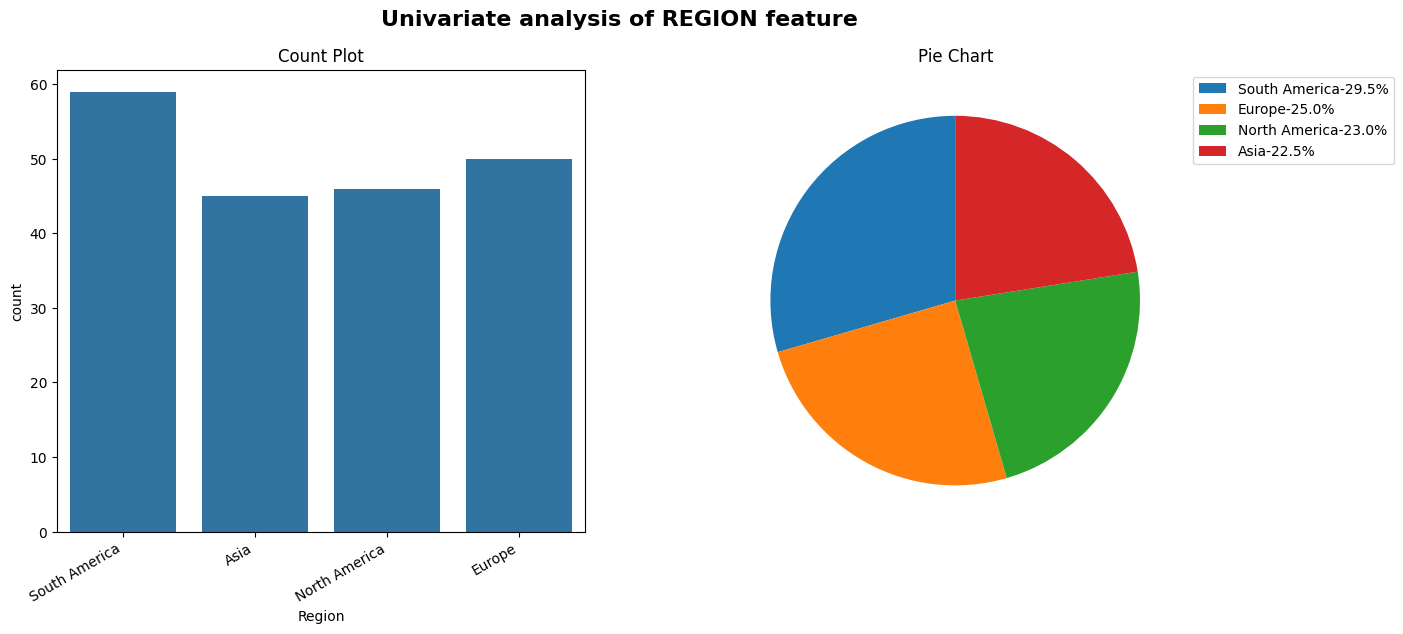

In [494]:
eda.cat_univar_plots(customers_df,"Region")

##Price

In [495]:
eda.num_info(products_df,"Price")

╭──────╮
│ Data │
╰──────╯

0     169.30
1     346.30
2      44.12
3      95.69
4     429.31
       ...  
95    307.47
96    319.34
97    299.93
98    354.29
99    126.34
Name: Price, Length: 100, dtype: float64



╭─────────────╮
│ Description │
╰─────────────╯

            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000



╭────────────────────────────╮
│ Missing Values Information │
╰────────────────────────────╯

Missing values count: 0 

Missing values Percentage: 0.0 



Skewness: -0.20449231087647682


Kurtosis: -1.2436047832056067


<Axes: xlabel='Price', ylabel='Count'>

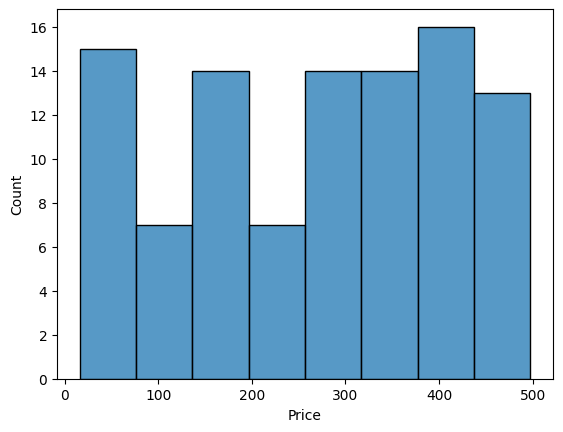

In [496]:
sns.histplot(products_df["Price"])

<Axes: xlabel='Price', ylabel='Density'>

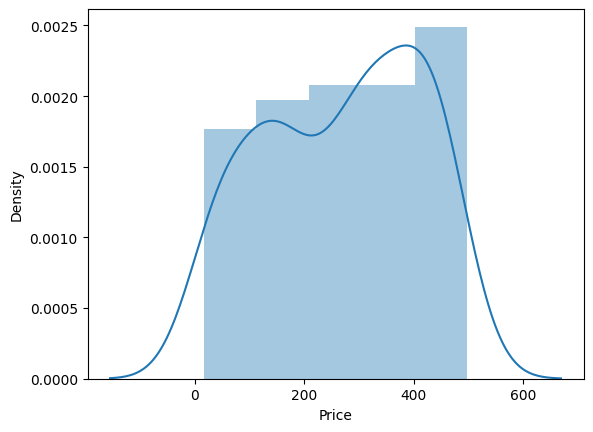

In [497]:
sns.distplot(products_df["Price"])

##ProductID

In [498]:
eda.cat_info(final_df,"ProductID")

╭──────╮
│ Data │
╰──────╯

0       P054
1       P022
2       P096
3       P083
4       P029
        ... 
996     P034
997     P057
998     P061
999     P048
1000    P064
Name: ProductID, Length: 1001, dtype: object



╭─────────────╮
│ Description │
╰─────────────╯

       ProductID
count       1000
unique       100
top         P059
freq          19



╭────────────────────────────╮
│ Missing Values Information │
╰────────────────────────────╯

Missing values count: 1 

Missing values Percentage: 0.0999000999000999 



╭──────────────────────────────────╮
│ Frequency count of each category │
╰──────────────────────────────────╯

           Count  percentages
ProductID                    
P059          19          1.9
P029          17          1.7
P079          16          1.6
P062          16          1.6
P061          16          1.6
...          ...          ...
P024           5          0.5
P031           4          0.4
P014           4          0.4
P099           4          0.4
P044           4          0.4

[100 rows x 2 columns]


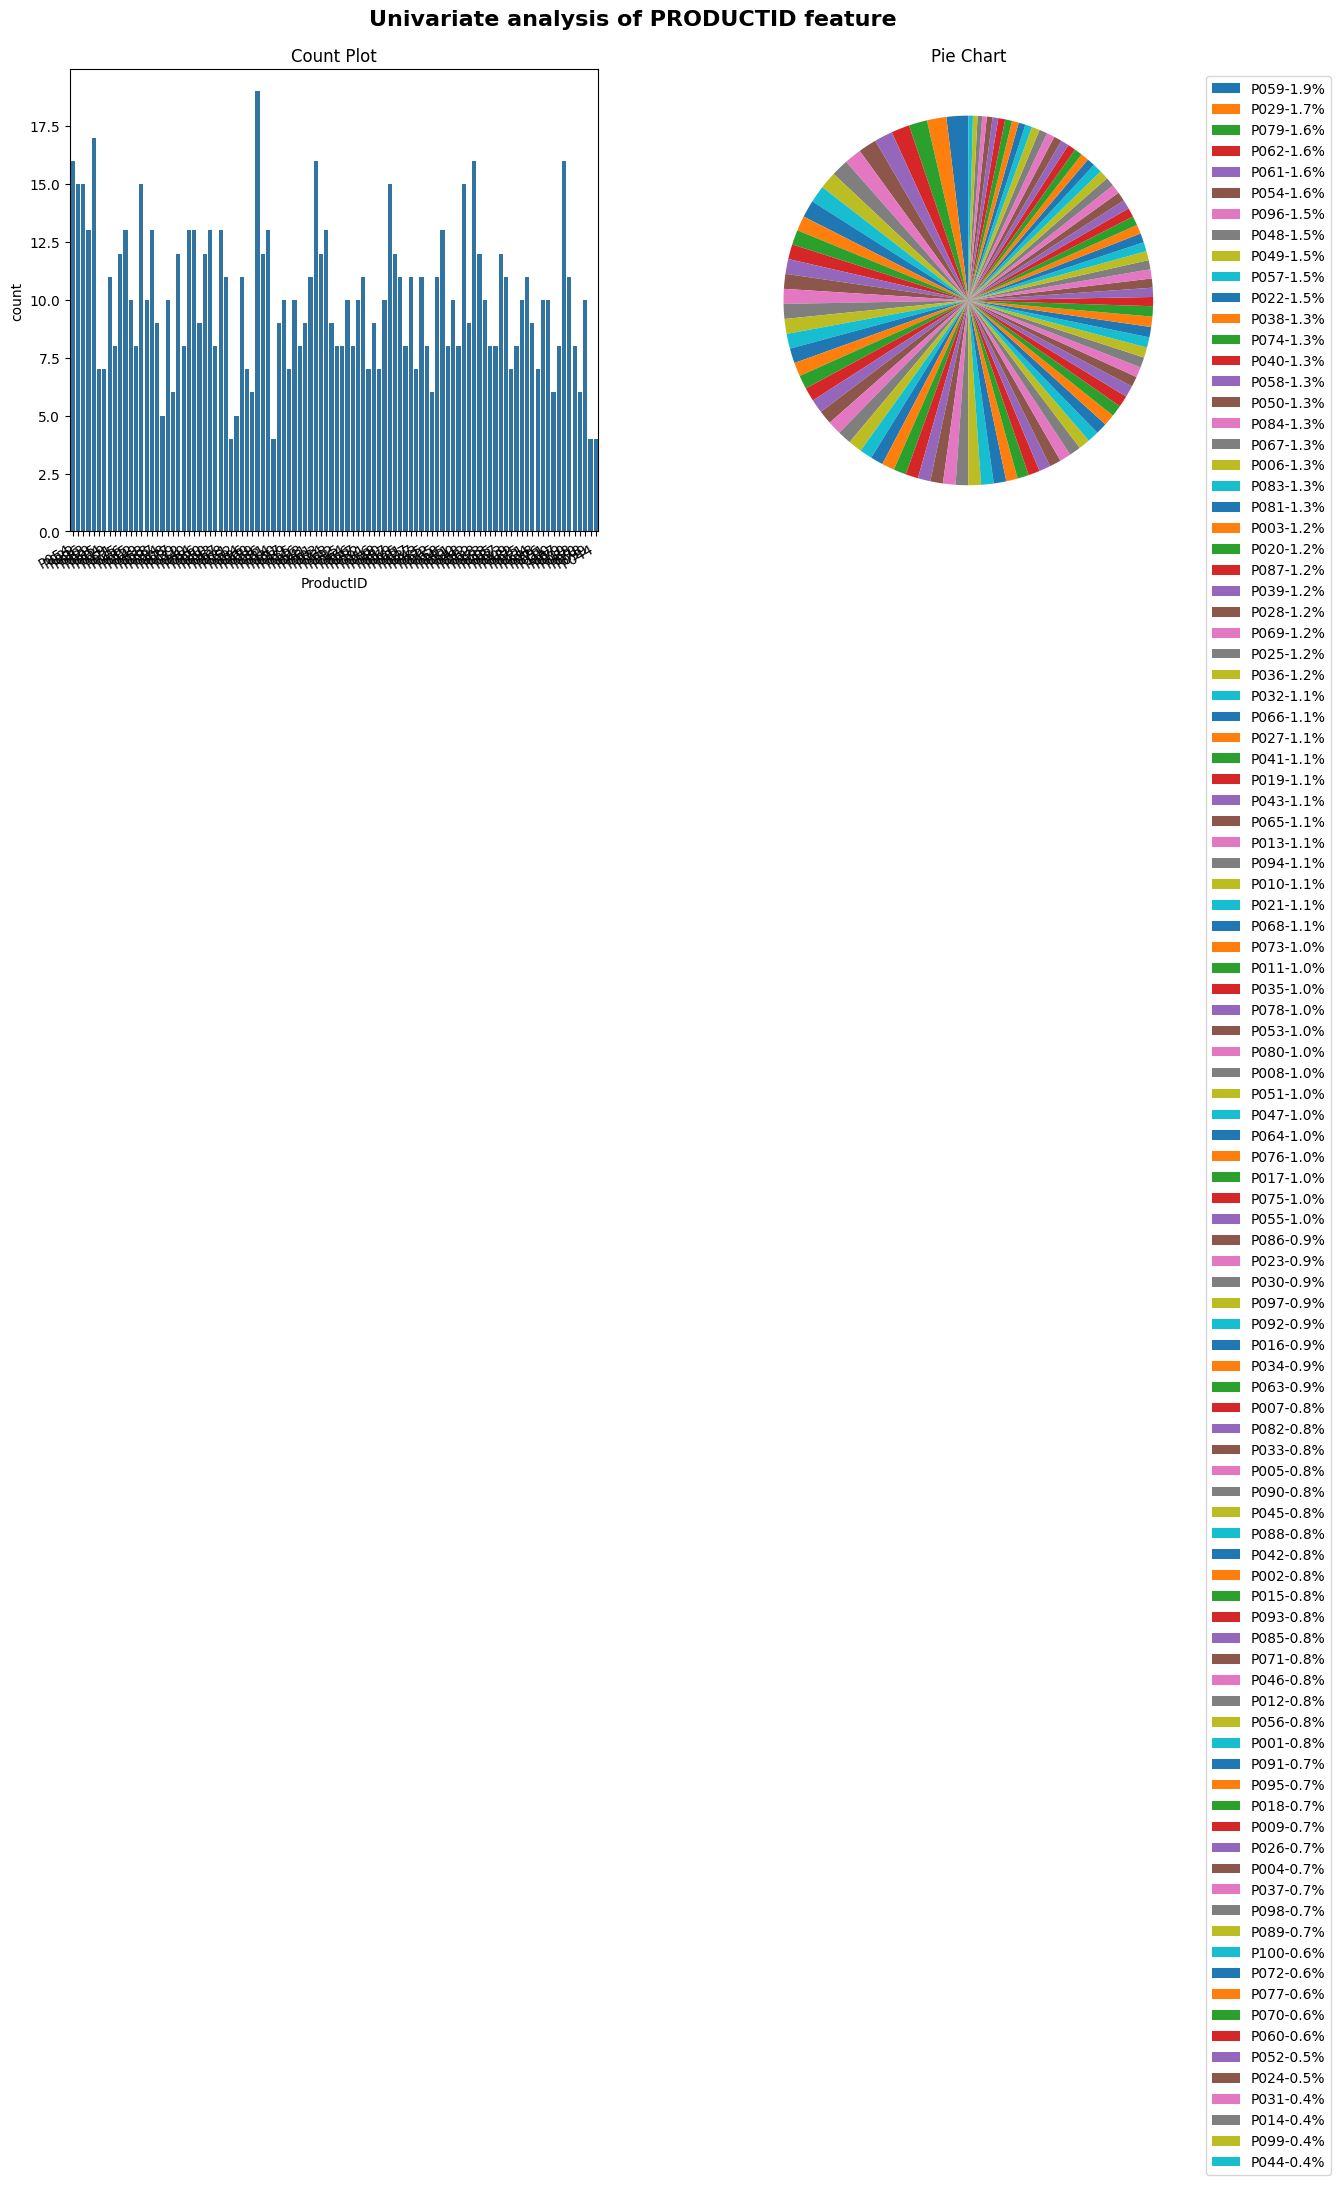

In [499]:
eda.cat_univar_plots(final_df,"ProductID")

In [500]:
eda.cat_info(final_df,"ProductName")

╭──────╮
│ Data │
╰──────╯

0            SoundWave Cookbook
1            HomeSense Wall Art
2          SoundWave Headphones
3         ActiveWear Smartwatch
4            TechPro Headphones
                 ...           
996           HomeSense T-Shirt
997       ActiveWear Smartphone
998         HomeSense Desk Lamp
999            TechPro Cookbook
1000    HomeSense Running Shoes
Name: ProductName, Length: 1001, dtype: object



╭─────────────╮
│ Description │
╰─────────────╯

                  ProductName
count                    1000
unique                     66
top     ActiveWear Smartwatch
freq                       40



╭────────────────────────────╮
│ Missing Values Information │
╰────────────────────────────╯

Missing values count: 1 

Missing values Percentage: 0.0999000999000999 



╭──────────────────────────────────╮
│ Frequency count of each category │
╰──────────────────────────────────╯

                             Count  percentages
ProductName                                    
ActiveWear Smartwatch           40          4.0
SoundWave Headphones            38          3.8
BookWorld Biography             30          3.0
SoundWave Cookbook              29          2.9
ActiveWear Rug                  29          2.9
...                            ...          ...
SoundWave Bluetooth Speaker      7          0.7
BookWorld Wall Art               7          0.7
SoundWave Laptop                 7          0.7
BookWorld Cookware Set           7          0.7
SoundWave Jacket                 5          0.5

[66 rows x 2 columns]


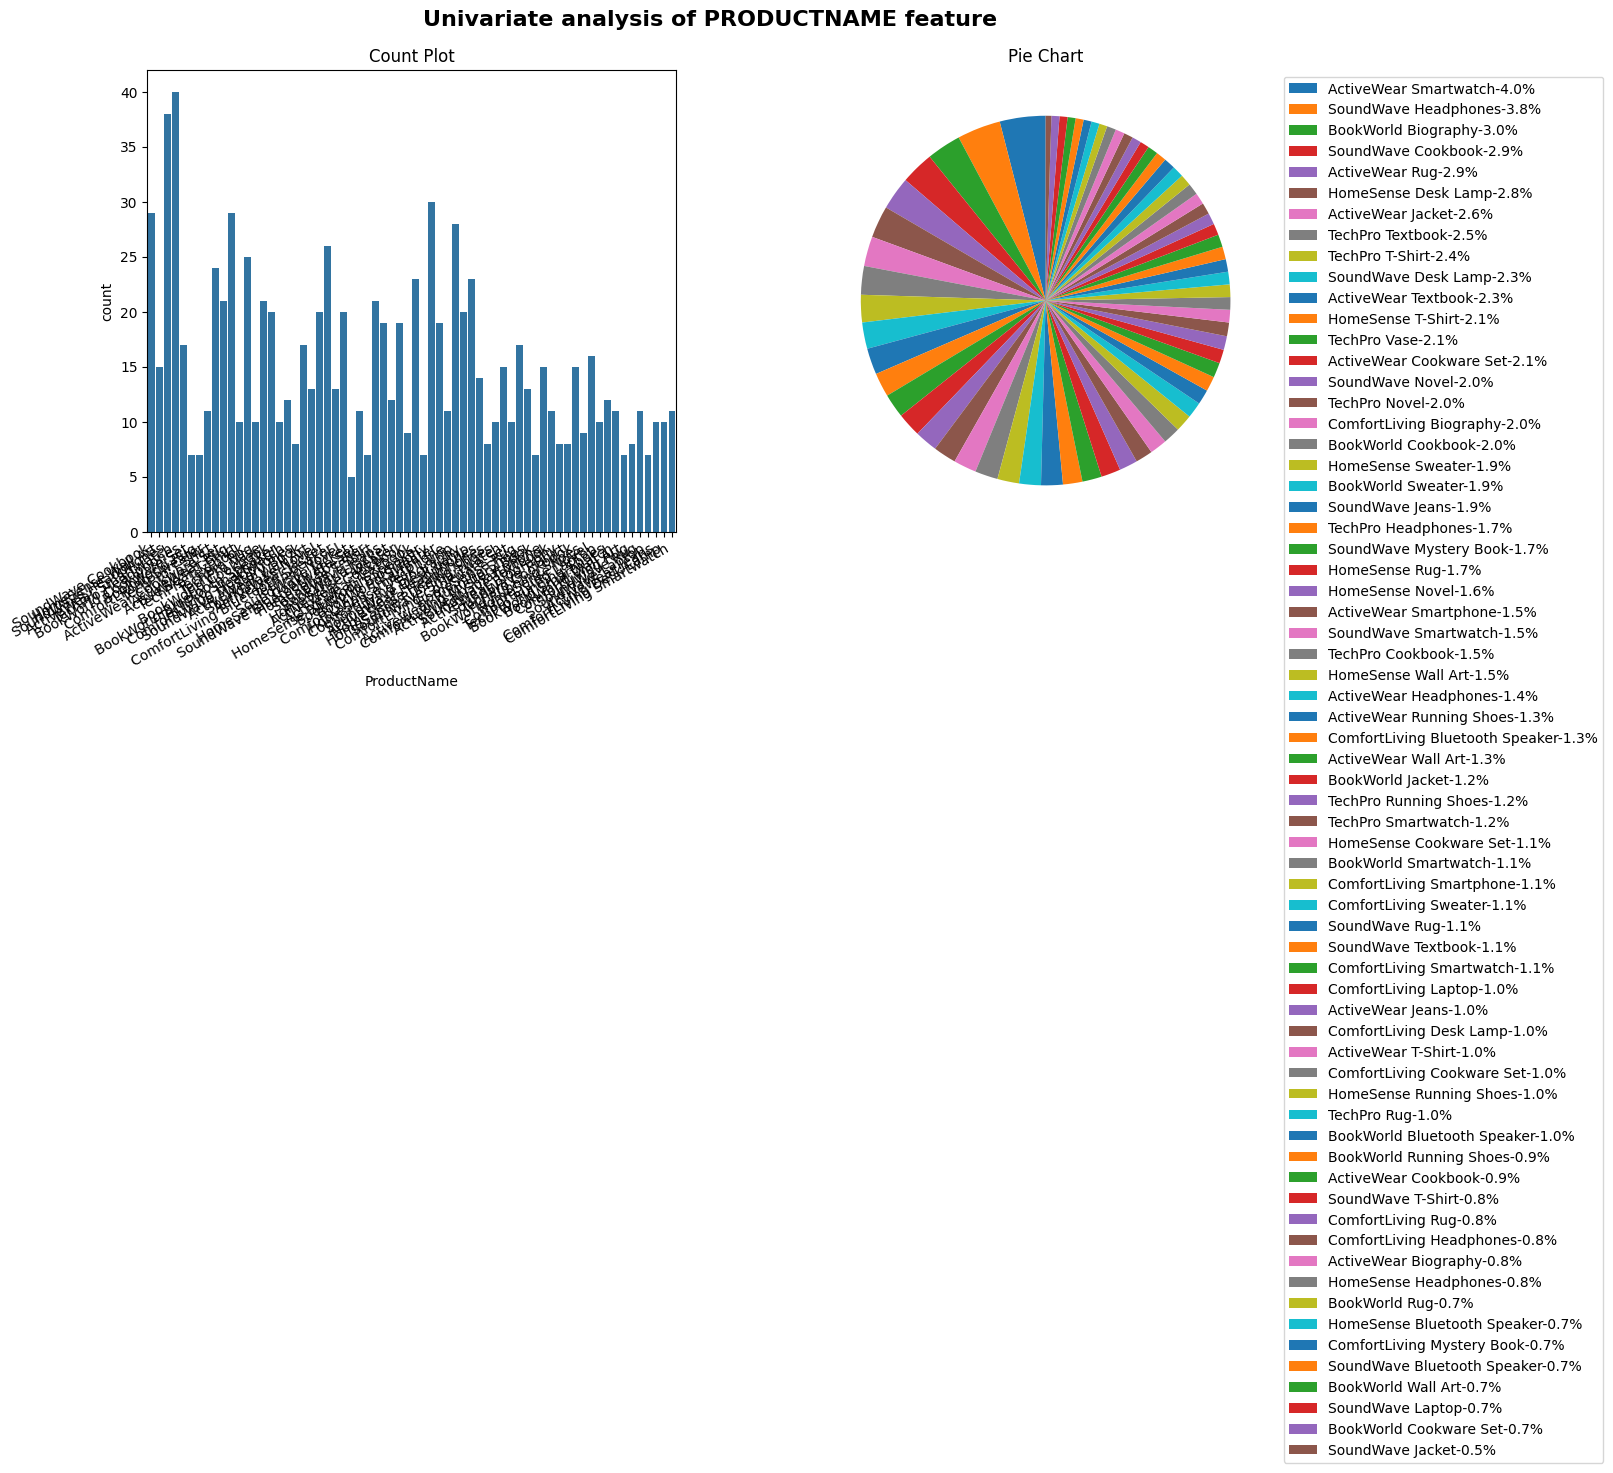

In [501]:
eda.cat_univar_plots(final_df,"ProductName")

##Category

In [502]:
eda.cat_info(final_df,"Category")

╭──────╮
│ Data │
╰──────╯

0             Books
1        Home Decor
2       Electronics
3       Electronics
4       Electronics
           ...     
996        Clothing
997     Electronics
998      Home Decor
999           Books
1000       Clothing
Name: Category, Length: 1001, dtype: object



╭─────────────╮
│ Description │
╰─────────────╯

       Category
count      1000
unique        4
top       Books
freq        270



╭────────────────────────────╮
│ Missing Values Information │
╰────────────────────────────╯

Missing values count: 1 

Missing values Percentage: 0.0999000999000999 



╭──────────────────────────────────╮
│ Frequency count of each category │
╰──────────────────────────────────╯

             Count  percentages
Category                       
Books          270         27.0
Electronics    254         25.4
Home Decor     248         24.8
Clothing       228         22.8


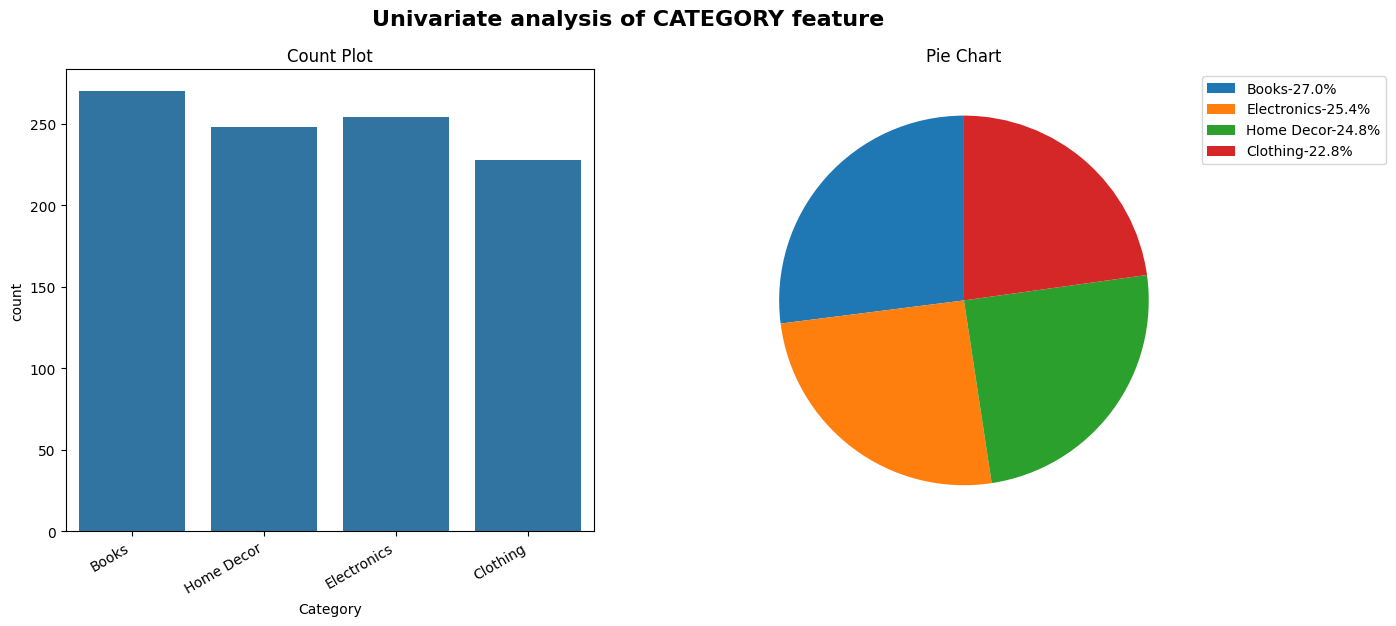

In [503]:
eda.cat_univar_plots(final_df,"Category")

#Obseravtions

    1)Most of the customers are from South America, followed by Europe.

    2)Most of the product prices range between 20 and 480.

    3)Sales across all categories are approximately equal.

In [504]:
final_df.duplicated().sum()

0

In [505]:
final_df['SignupDate'] = pd.to_datetime(final_df['SignupDate'], errors='coerce')
final_df['TransactionDate'] = pd.to_datetime(final_df['TransactionDate'], errors='coerce')

In [506]:
final_df['TransactionDate'].fillna(final_df['TransactionDate'].min(), inplace=True)
final_df.dropna(subset=['CustomerID', 'ProductID', 'TransactionDate'], inplace=True)

###Extracting Features from Date Columns

In [507]:
final_df['transaction_Year'] = final_df['TransactionDate'].dt.year
final_df['transaction_Month'] = final_df['TransactionDate'].dt.month
final_df['transaction_Day'] = final_df['TransactionDate'].dt.day
final_df['transaction_Recency'] = (pd.Timestamp.now() - final_df['TransactionDate']).dt.days
final_df['SignupDuration'] = (pd.Timestamp.now() - final_df['SignupDate']).dt.days

In [508]:
final_df.head()

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,ProductName,Category,Price,transaction_Year,transaction_Month,transaction_Day,transaction_Recency,SignupDuration
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2.0,114.60,SoundWave Cookbook,Books,57.30,2024,1,19,374,932
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3.0,412.62,HomeSense Wall Art,Home Decor,137.54,2024,9,17,132,932
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2.0,614.94,SoundWave Headphones,Electronics,307.47,2024,4,8,294,932
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2.0,911.44,ActiveWear Smartwatch,Electronics,455.72,2024,5,7,265,932
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3.0,1300.92,TechPro Headphones,Electronics,433.64,2024,11,2,86,932


In [509]:
final_df.drop(columns=['SignupDate', 'TransactionDate'], inplace=True)

In [511]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1000
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           1000 non-null   object 
 1   CustomerName         1000 non-null   object 
 2   Region               1000 non-null   object 
 3   TransactionID        1000 non-null   object 
 4   ProductID            1000 non-null   object 
 5   Quantity             1000 non-null   float64
 6   TotalValue           1000 non-null   float64
 7   ProductName          1000 non-null   object 
 8   Category             1000 non-null   object 
 9   Price                1000 non-null   float64
 10  transaction_Year     1000 non-null   int32  
 11  transaction_Month    1000 non-null   int32  
 12  transaction_Day      1000 non-null   int32  
 13  transaction_Recency  1000 non-null   int64  
 14  SignupDuration       1000 non-null   int64  
dtypes: float64(3), int32(3), int64(2), object(7

In [512]:
final_df["ProductName"].value_counts()

,count
ProductName,
ActiveWear Smartwatch,40
SoundWave Headphones,38
BookWorld Biography,30
SoundWave Cookbook,29
ActiveWear Rug,29
...,...
SoundWave Bluetooth Speaker,7
BookWorld Wall Art,7
SoundWave Laptop,7


In [513]:
columns=["CustomerID","ProductID","TransactionID"]

for  x in columns:
  final_df[x]=final_df[x].str[1:]
  final_df[x]=final_df[x].astype(int)

In [514]:
final_df.head()

,CustomerID,CustomerName,Region,TransactionID,ProductID,Quantity,TotalValue,ProductName,Category,Price,transaction_Year,transaction_Month,transaction_Day,transaction_Recency,SignupDuration
0,1,Lawrence Carroll,South America,15,54,2.0,114.60,SoundWave Cookbook,Books,57.30,2024,1,19,374,932
1,1,Lawrence Carroll,South America,932,22,3.0,412.62,HomeSense Wall Art,Home Decor,137.54,2024,9,17,132,932
2,1,Lawrence Carroll,South America,85,96,2.0,614.94,SoundWave Headphones,Electronics,307.47,2024,4,8,294,932
3,1,Lawrence Carroll,South America,445,83,2.0,911.44,ActiveWear Smartwatch,Electronics,455.72,2024,5,7,265,932
4,1,Lawrence Carroll,South America,436,29,3.0,1300.92,TechPro Headphones,Electronics,433.64,2024,11,2,86,932


In [515]:
final_df=final_df.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'TotalValue': 'sum',
    'transaction_Recency': 'mean',
    'ProductID': 'nunique',
    'SignupDuration':'first',
    'Region':'first',
    'Category':lambda x: x.mode()[0],
}).rename(columns={
    'TransactionID': 'TotalTransactions',
    'TotalValue': 'TotalSpending',
    'ProductID': 'UniqueProducts',
    'Category':'FavouriteCategory',
}).reset_index()

In [516]:
final_df.head()

,CustomerID,TotalTransactions,TotalSpending,transaction_Recency,UniqueProducts,SignupDuration,Region,FavouriteCategory
0,1,5,3354.52,230.20,5,932,South America,Electronics
1,2,4,1862.74,204.25,4,1079,Asia,Clothing
2,3,4,2725.38,240.25,4,326,South America,Home Decor
3,4,8,5354.88,177.00,8,841,South America,Books
4,5,3,2034.24,223.00,3,896,Asia,Electronics


In [517]:
final_df=pd.get_dummies(final_df,columns=['Region','FavouriteCategory'],drop_first=True,dtype='int32')

In [518]:
final_df.head()

,CustomerID,TotalTransactions,TotalSpending,transaction_Recency,UniqueProducts,SignupDuration,Region_Europe,Region_North America,Region_South America,FavouriteCategory_Clothing,FavouriteCategory_Electronics,FavouriteCategory_Home Decor
0,1,5,3354.52,230.20,5,932,0,0,1,0,1,0
1,2,4,1862.74,204.25,4,1079,0,0,0,1,0,0
2,3,4,2725.38,240.25,4,326,0,0,1,0,0,1
3,4,8,5354.88,177.00,8,841,0,0,1,0,0,0
4,5,3,2034.24,223.00,3,896,0,0,0,0,1,0


In [519]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [520]:
columns_to_normalize = ["TotalSpending","transaction_Recency","SignupDuration"]
final_df[columns_to_normalize] = scaler.fit_transform(final_df[columns_to_normalize])

In [521]:
final_df.head()

,CustomerID,TotalTransactions,TotalSpending,transaction_Recency,UniqueProducts,SignupDuration,Region_Europe,Region_North America,Region_South America,FavouriteCategory_Clothing,FavouriteCategory_Electronics,FavouriteCategory_Home Decor
0,1,5,-0.061701,0.197399,5,1.148752,0,0,1,0,1,0
1,2,4,-0.877744,-0.274018,4,1.600431,0,0,0,1,0,0
2,3,4,-0.405857,0.379971,4,-0.713270,0,0,1,0,0,1
3,4,8,1.032547,-0.769052,8,0.869141,0,0,1,0,0,0
4,5,3,-0.783929,0.066601,3,1.038137,0,0,0,0,1,0


In [522]:
final_df.to_csv("final_df",index=False)